In [1]:
### Импорт необходимых библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

Рассмотрим датасет https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [2]:
data = pd.read_csv('winequality-red.csv', sep=';')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1. Рассчитать коэффициент корреляции;
 Оценить меру связи;
 Построить гистограммы рассеяния, линию аппроксимации и посчитать величину достоверности аппроксимации R^2.

*1. Подсчёт коэффициента корреляции и оценка меры связи между процентным содержанием алкоголя (alcohol) и качеством вина (quality)*

In [3]:
corr_coeff, p_value = pearsonr(data['alcohol'], data['quality'])

print(f"Коэффициент кореляции Пирсона: {corr_coeff:.3f}")
print(f"p-value: {p_value:.3f}")

Коэффициент кореляции Пирсона: 0.476
p-value: 0.000


Коэффициэнт корреляции Пирсона 0.476 говорит о не очень высокой корреляции между высоким содержанием алкоголя и качеством вина.

P-value 0 о том, что вероятность получить корреляцию 0.476 случайным образом крайне близка к 0.

Построим гистограмму рассеяния, линию аппроксимации и R^2.

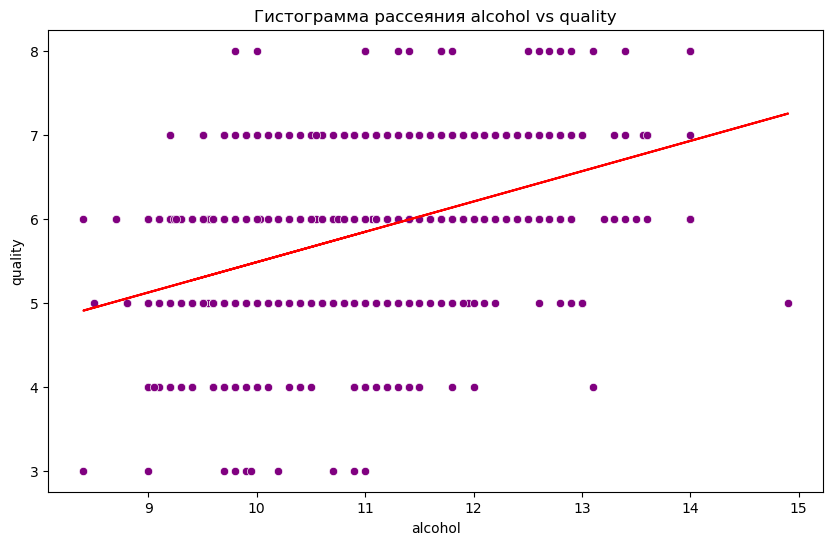

In [4]:
### Гистаграмма рассеяния

plt.figure(figsize=(10,6))
sns.scatterplot(x='alcohol', y='quality', data=data, color='purple')
plt.title('Гистограмма рассеяния alcohol vs quality')
plt.xlabel('alcohol')
plt.ylabel('quality')


### Линия аппроксимации

X = data[['alcohol']]
y = data['quality']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red', label="Линия аппроксимации")


In [5]:
### Рассчёт коэффициента детерминации R^2

r_square = model.score(X, y)
r_square

0.22673436811275482

R^2 = 0.227

2. Выборка ~1/3 наблюдений случайным образом/стратифицированную выборку

In [6]:
### Случайная выборка

random_sample = data.sample(frac=1/3, random_state=42)

random_sample.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,6


In [7]:
### Стратифицированная выборка

stratified_sample = data.groupby('residual sugar', group_keys=False).apply(lambda x: x.sample(frac=1/3, random_state=42))

stratified_sample.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_16784\2904098919.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = data.groupby('residual sugar', group_keys=False).apply(lambda x: x.sample(frac=1/3, random_state=42))


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1018,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6
198,5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.99240,3.57,0.85,13.0,7
1316,5.4,0.740,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
428,9.1,0.520,0.33,1.3,0.070,9.0,30.0,0.99780,3.24,0.60,9.3,5


3. Посчитать:
   - среднее значение по случайной и стратифицированной выборке
   - доверительный интервал для среднего (90%, 95%, 99%)
   - сравнить среднее генеральной выборки из п.2 с полученными в выборках 2.1 и 2.2 и с границами доверительных интервалов.

In [8]:
### Задаём функцию для доверительного интервала

def confidence_interval(data, confidence):
    n = len(data)
    mean = np.mean(data)
    standard_error_mean = stats.sem(data)
    h = standard_error_mean * stats.t.ppf((1 + confidence)/2., n-1)
    return mean, mean-h, mean+h

In [9]:
### Считаем среднее значение по выборкам 2.1, 2.2

random_mean = random_sample['alcohol'].mean()
stratified_mean = stratified_sample['alcohol'].mean()

print(f"Среднее значение случайной выборки: {random_mean:.2f}")
print(f"Среднее значение стратифицированной выборки: {stratified_mean:.2f}")

Среднее значение случайной выборки: 10.44
Среднее значение стратифицированной выборки: 10.37


In [10]:
### Считаем доверительные интервалы для среднего

### random sample
ci_90_random = confidence_interval(random_sample['alcohol'], confidence=0.90)
ci_95_random = confidence_interval(random_sample['alcohol'], confidence=0.95)
ci_99_random = confidence_interval(random_sample['alcohol'], confidence=0.99)

### stratified sample
ci_90_stratified = confidence_interval(stratified_sample['alcohol'], confidence=0.90)
ci_95_stratified = confidence_interval(stratified_sample['alcohol'], confidence=0.95)
ci_99_stratified = confidence_interval(stratified_sample['alcohol'], confidence=0.99)

In [13]:
print("Доверительные интервалы для случайной выборки:")
print(f"90%: ({ci_90_random[1]:.3f}, {ci_90_random[2]:.3f})")
print(f"95%: ({ci_95_random[1]:.3f}, {ci_95_random[2]:.3f})")
print(f"99%: ({ci_99_random[1]:.3f}, {ci_99_random[2]:.3f})")

Доверительные интервалы для случайной выборки:
90%: (10.363, 10.516)
95%: (10.349, 10.531)
99%: (10.320, 10.560)


In [14]:
print("Доверительные интервалы для стратифицированной выборки:")
print(f"90%: ({ci_90_stratified[1]:.3f}, {ci_90_stratified[2]:.3f})")
print(f"95%: ({ci_95_stratified[1]:.3f}, {ci_95_stratified[2]:.3f})")
print(f"99%: ({ci_99_stratified[1]:.3f}, {ci_99_stratified[2]:.3f})")

Доверительные интервалы для стратифицированной выборки:
90%: (10.292, 10.444)
95%: (10.278, 10.458)
99%: (10.249, 10.487)


In [15]:
### Сравним среднее генеральной выборки с средним выборок и ловерительными интервалами

general_population_mean = data['alcohol'].mean()

print(f"Среднее значение генеральной выборки: {general_population_mean:.3f}")

Среднее значение генеральной выборки: 10.423


In [16]:
print(f"Случайная выборка: {general_population_mean:.3f} {'входит' if ci_90_random[1] <= general_population_mean <= ci_90_random[2] else 'не входит'} в 90% доверительный интервал")
print(f"Стратифицированная выборка: {general_population_mean:.3f} {'входит' if ci_90_stratified[1] <= general_population_mean <= ci_90_stratified[2] else 'не входит'} в 90% доверительный интервал")

Случайная выборка: 10.423 входит в 90% доверительный интервал
Стратифицированная выборка: 10.423 входит в 90% доверительный интервал


In [17]:
print(f"Случайная выборка: {general_population_mean:.3f} {'входит' if ci_95_random[1] <= general_population_mean <= ci_95_random[2] else 'не входит'} в 95% доверительный интервал")
print(f"Стратифицированная выборка: {general_population_mean:.3f} {'входит' if ci_95_stratified[1] <= general_population_mean <= ci_95_stratified[2] else 'не входит'} в 95% доверительный интервал")

Случайная выборка: 10.423 входит в 95% доверительный интервал
Стратифицированная выборка: 10.423 входит в 95% доверительный интервал


In [18]:
print(f"Случайная выборка: {general_population_mean:.3f} {'входит' if ci_99_random[1] <= general_population_mean <= ci_99_random[2] else 'не входит'} в 99% доверительный интервал")
print(f"Стратифицированная выборка: {general_population_mean:.3f} {'входит' if ci_99_stratified[1] <= general_population_mean <= ci_99_stratified[2] else 'не входит'} в 99% доверительный интервал")

Случайная выборка: 10.423 входит в 99% доверительный интервал
Стратифицированная выборка: 10.423 входит в 99% доверительный интервал
